>**TITLE :**
**Heart Disease Prediction**


>**AIM :** To analyze and predict the result whether the patient has heart disease or normal

>**KEY TAKEAWAYS :**

* This process involves data cleaning, data statistics, getting insights from the dataset.
* This involves four machine learning algorithms which will result in performance metrics of the model.
* The well-doing algorithm is implemented in the model and checking results with the real-time data.

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')


#Import dataset

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [ ]:
df = df.sort_values(by = 'Age', ascending=False)

In [ ]:
df.shape

(270, 13)

In [ ]:
df.head()

,Age,Sex,chest_pain,BP,cholesterol,fbs,ekg,heart_rate,exercise,ST,ST_slope,thallium,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,3,0


In [ ]:
df.tail()

,Age,Sex,chest_pain,BP,cholesterol,fbs,ekg,heart_rate,exercise,ST,ST_slope,thallium,target
265,52,1,3,172,199,1,0,162,0,0.5,1,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,1


In [ ]:
df.dtypes

Age              int64
Sex              int64
chest_pain       int64
BP               int64
cholesterol      int64
fbs              int64
ekg              int64
heart_rate       int64
exercise         int64
ST             float64
ST_slope         int64
thallium         int64
target           int64
dtype: object

In [ ]:
df['target']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64

In [ ]:
df.isnull().sum()

Age            0
Sex            0
chest_pain     0
BP             0
cholesterol    0
fbs            0
ekg            0
heart_rate     0
exercise       0
ST             0
ST_slope       0
thallium       0
target         0
dtype: int64

In [ ]:
df.describe()

,Age,Sex,chest_pain,BP,cholesterol,fbs,ekg,heart_rate,exercise,ST,ST_slope,thallium,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,7.000000,1.000000


#Data Cleaning

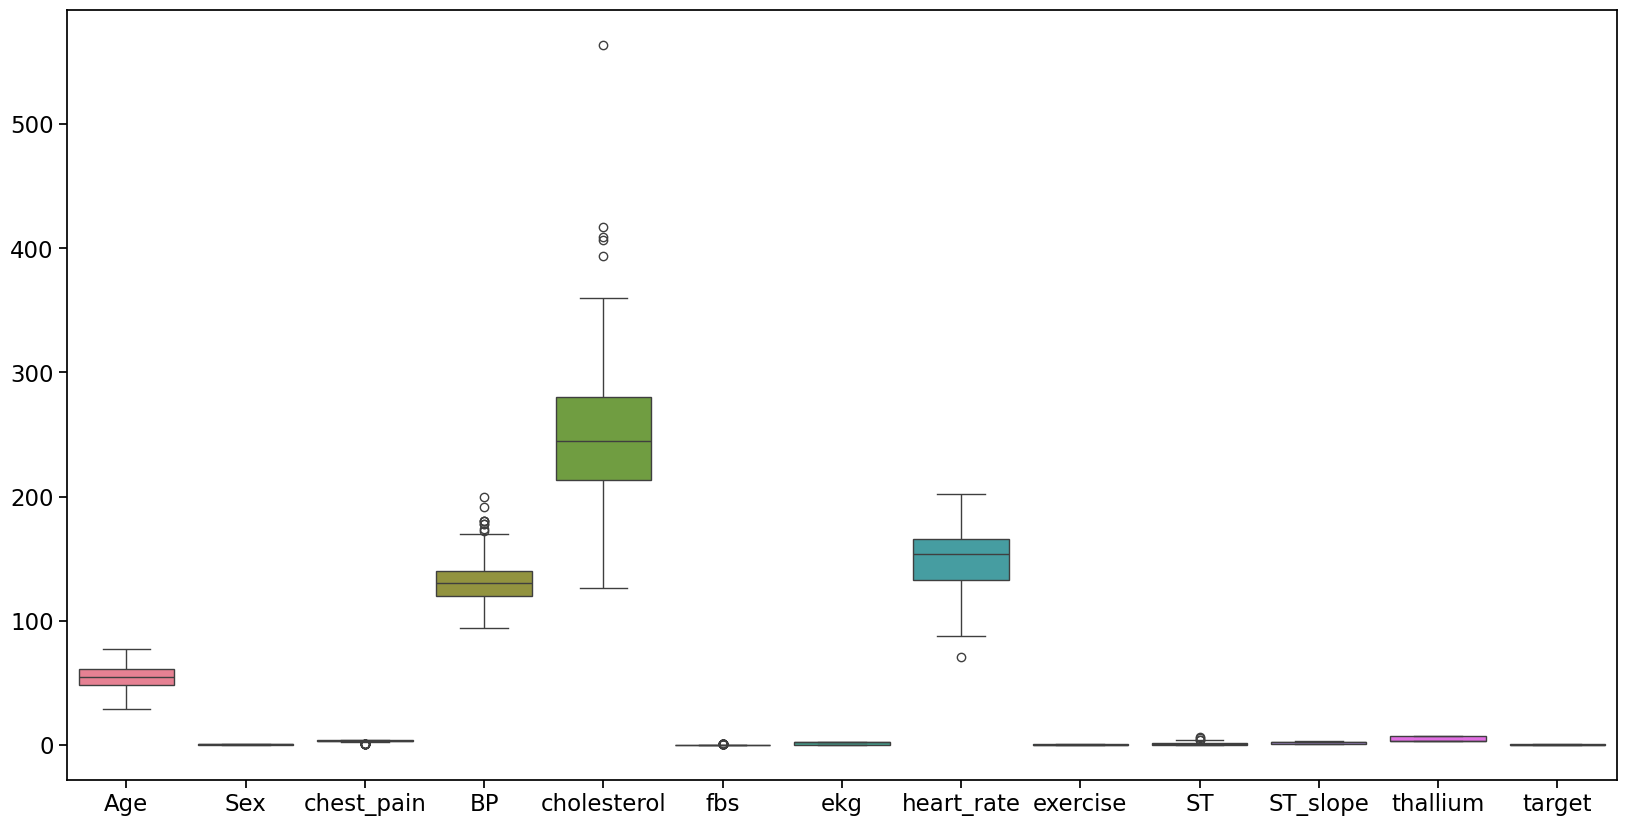

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outliers = find_outliers_IQR(df['BP'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 9
max outlier value: 200
min outlier value: 172


240    180
159    178
165    180
58     174
87     178
117    200
110    180
144    192
265    172
Name: BP, dtype: int64

In [ ]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = outliers.dropna().reset_index()
   return outliers_dropped

In [ ]:
upper_limit = df['BP'].mean() + 3*df["BP"].std()

print(upper_limit)

lower_limit = df['BP'].mean() - 3*df["BP"].std()

print(lower_limit)
df['BP'] = np.where(df['BP'] > upper_limit,

   upper_limit,

   np.where(df['BP'] < lower_limit, lower_limit, df['BP'] ))

184.929269322847
77.75961956604188


In [ ]:
df.describe()[['BP']]

,BP
count,270.000000
mean,131.262439
std,17.583485
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,184.929269


In [ ]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           ))
   return df

In [ ]:
df['BP'] = impute_outliers_IQR(df['BP'])

df.describe()['BP']

count    270.000000
mean     129.668007
std       15.150004
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: BP, dtype: float64

<Axes: ylabel='BP'>

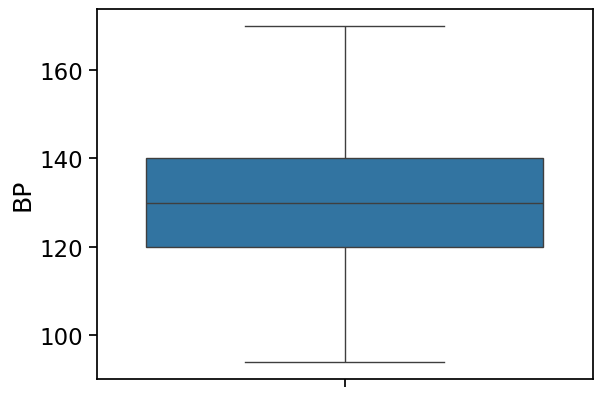

In [ ]:
sns.boxplot(df['BP'])

<Axes: ylabel='cholesterol'>

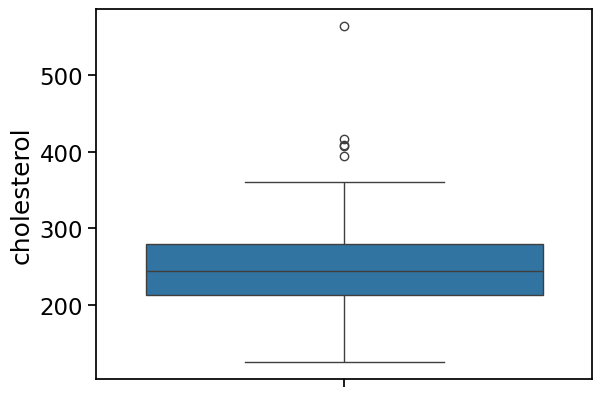

In [ ]:
sns.boxplot(df['cholesterol'])

In [ ]:
df['cholesterol'] = impute_outliers_IQR(df['cholesterol'])
df.describe()['cholesterol']

count    270.000000
mean     246.167764
std       43.862761
min      126.000000
25%      213.000000
50%      245.000000
75%      274.750000
max      360.000000
Name: cholesterol, dtype: float64

<Axes: ylabel='cholesterol'>

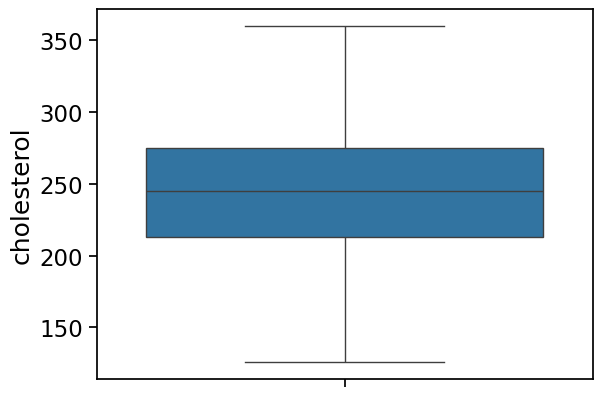

In [ ]:
sns.boxplot(df['cholesterol'])

#Data Visualization

    Target variable -> 'Heart Disease'

In [ ]:
df["target"].value_counts()

target
0    150
1    120
Name: count, dtype: int64

<Axes: xlabel='target'>

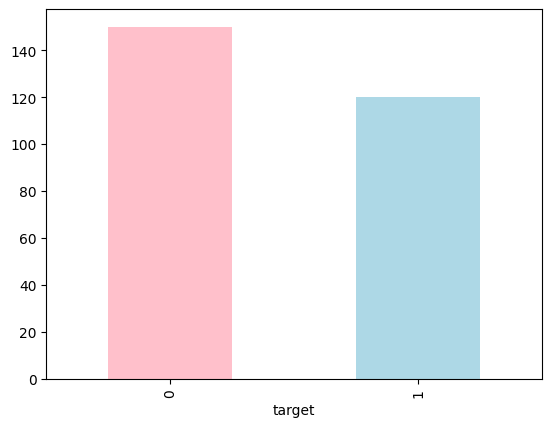

In [ ]:
df["target"].value_counts().plot(kind='bar', color=["pink","lightblue"])

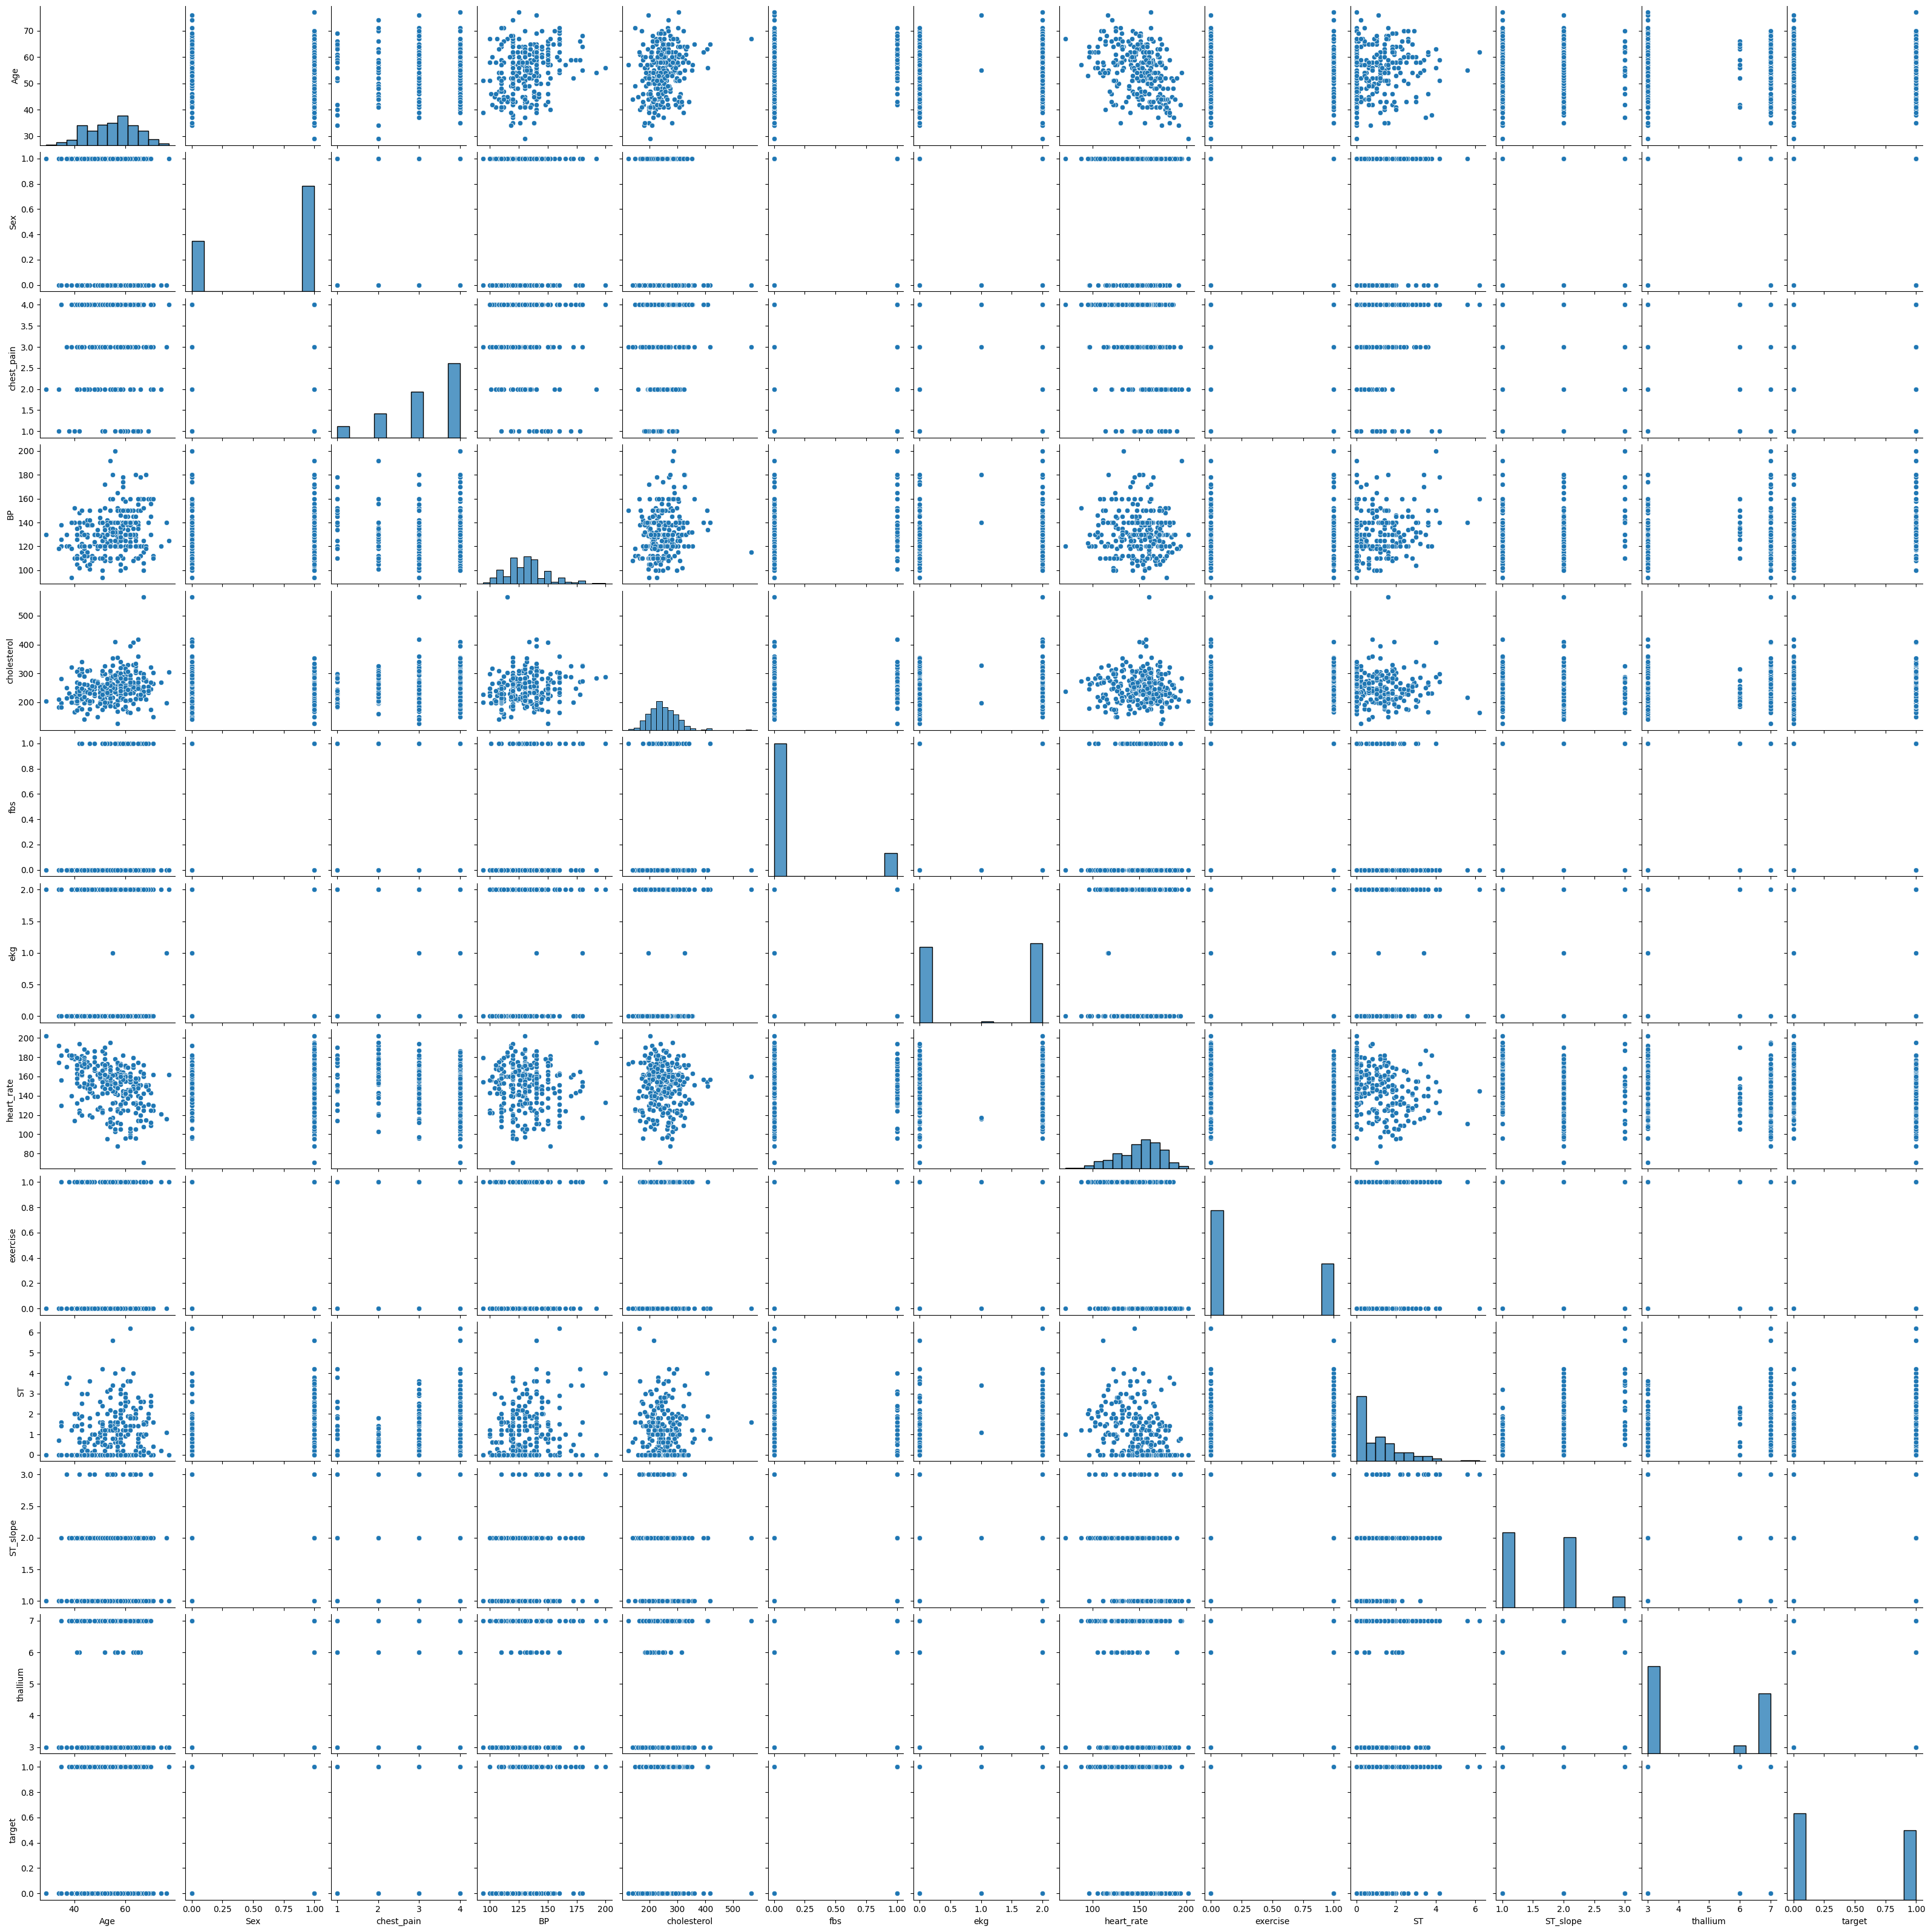

In [ ]:
sns.pairplot(df)

In [ ]:
df.dtypes

Age              int64
Sex              int64
chest_pain       int64
BP               int64
cholesterol      int64
fbs              int64
ekg              int64
heart_rate       int64
exercise         int64
ST             float64
ST_slope         int64
thallium         int64
target           int64
dtype: object

In [ ]:
df.corr()

,Age,Sex,chest_pain,BP,cholesterol,fbs,ekg,heart_rate,exercise,ST,ST_slope,thallium,target
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.391046,0.297721
chest_pain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.132045,0.155383
cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.028836,0.118021
fbs,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.049237,-0.016319
ekg,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.007337,0.182091
heart_rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.253397,-0.418514
exercise,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.321449,0.419303
ST,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.324333,0.417967


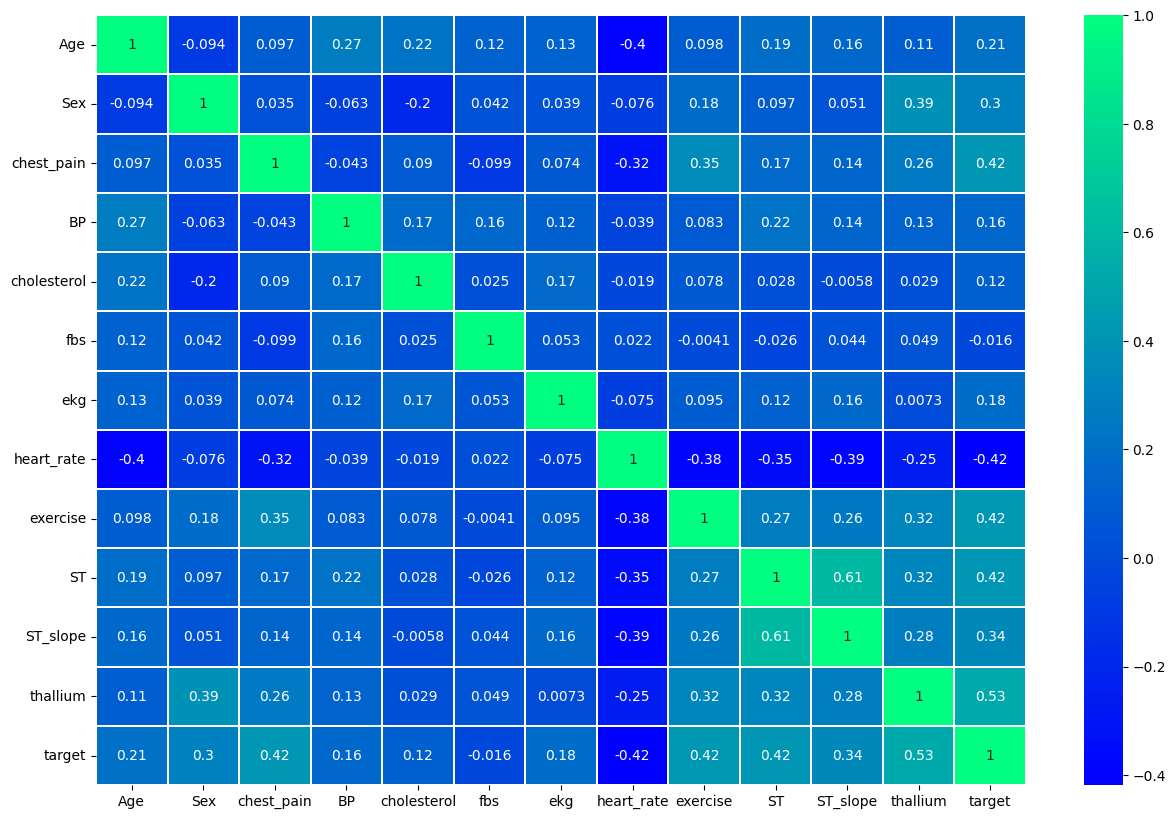

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

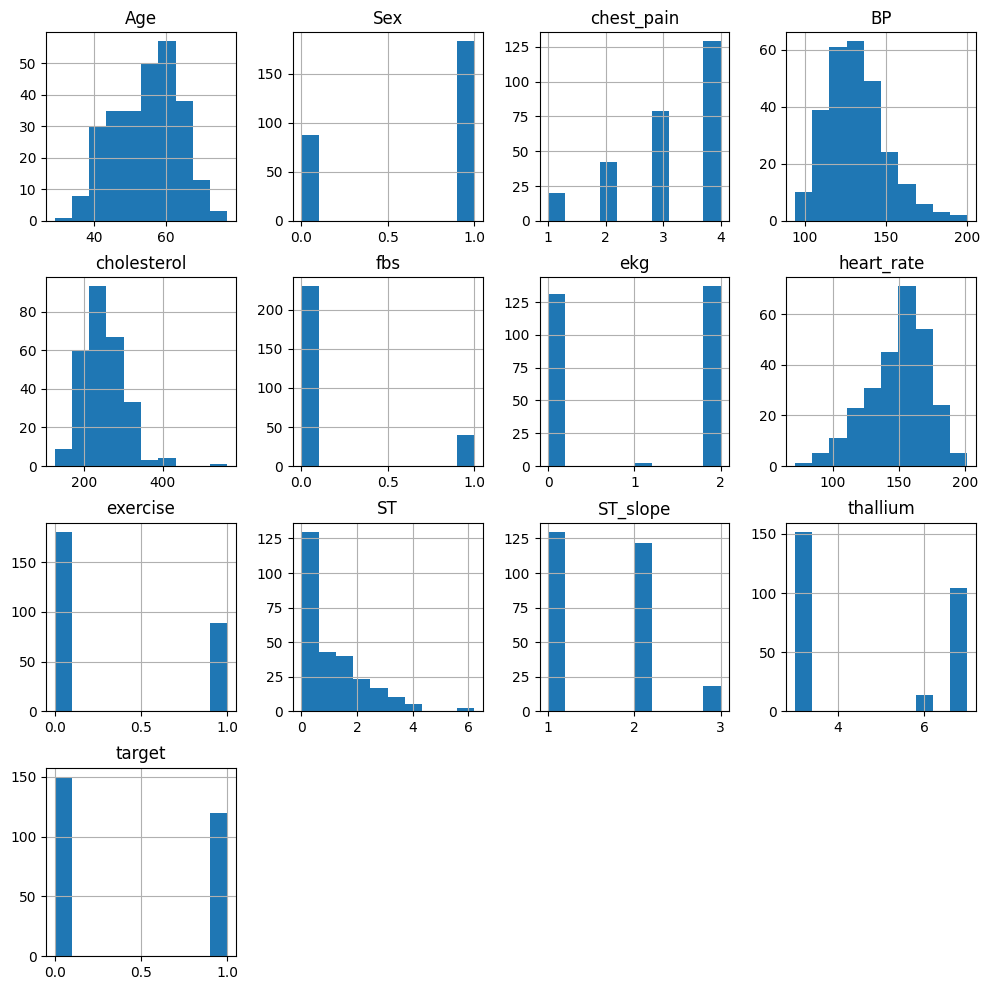

In [ ]:
df.hist(figsize=(12,12))
plt.savefig('Histogram for separate features')

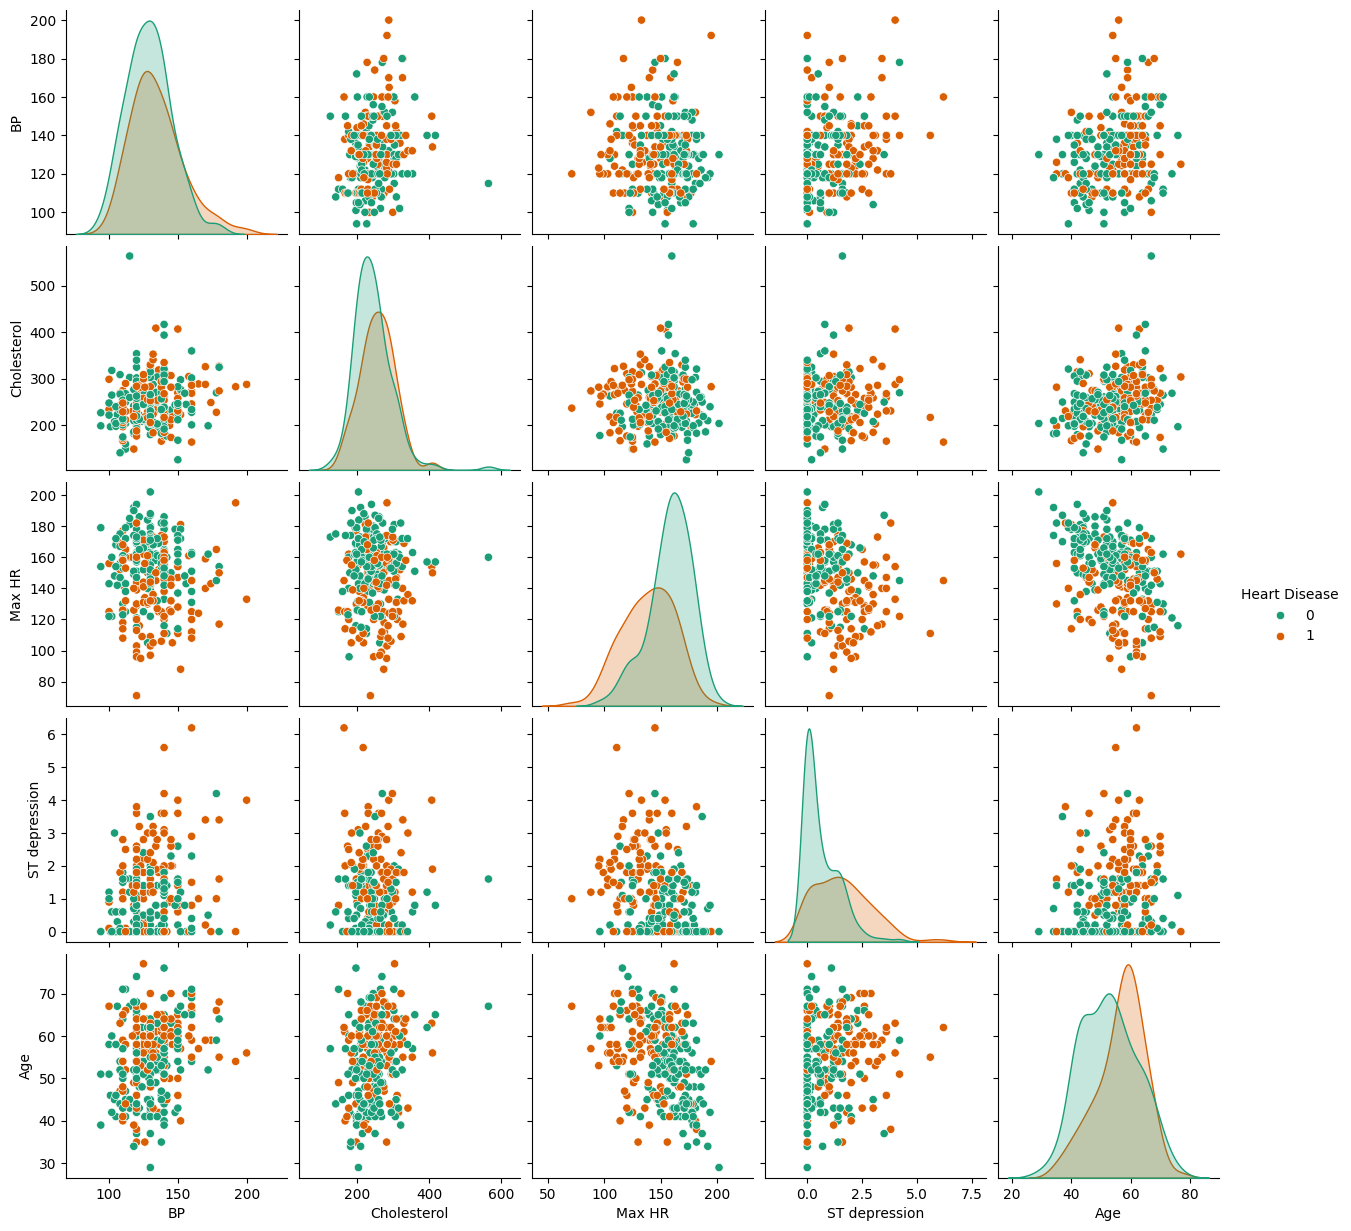

In [ ]:
sns.pairplot(df[['BP','Cholesterol','Max HR','ST depression','Age', 'Heart Disease']],hue='Heart Disease', palette='Dark2');

<Axes: xlabel='Age'>

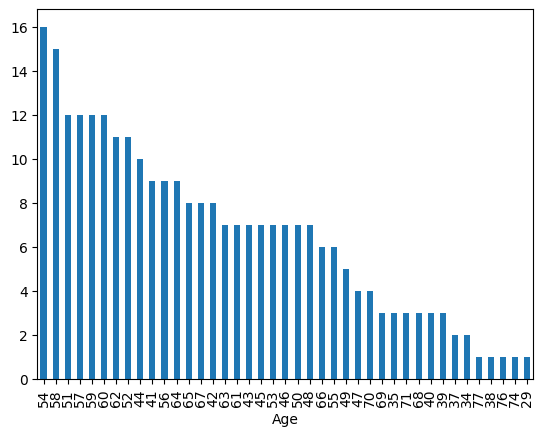

In [ ]:
df['Age'].value_counts().plot.bar()

In [ ]:
pd.crosstab(df["target"],df["Sex"])

Sex,0,1
target,,
0,67,83
1,20,100


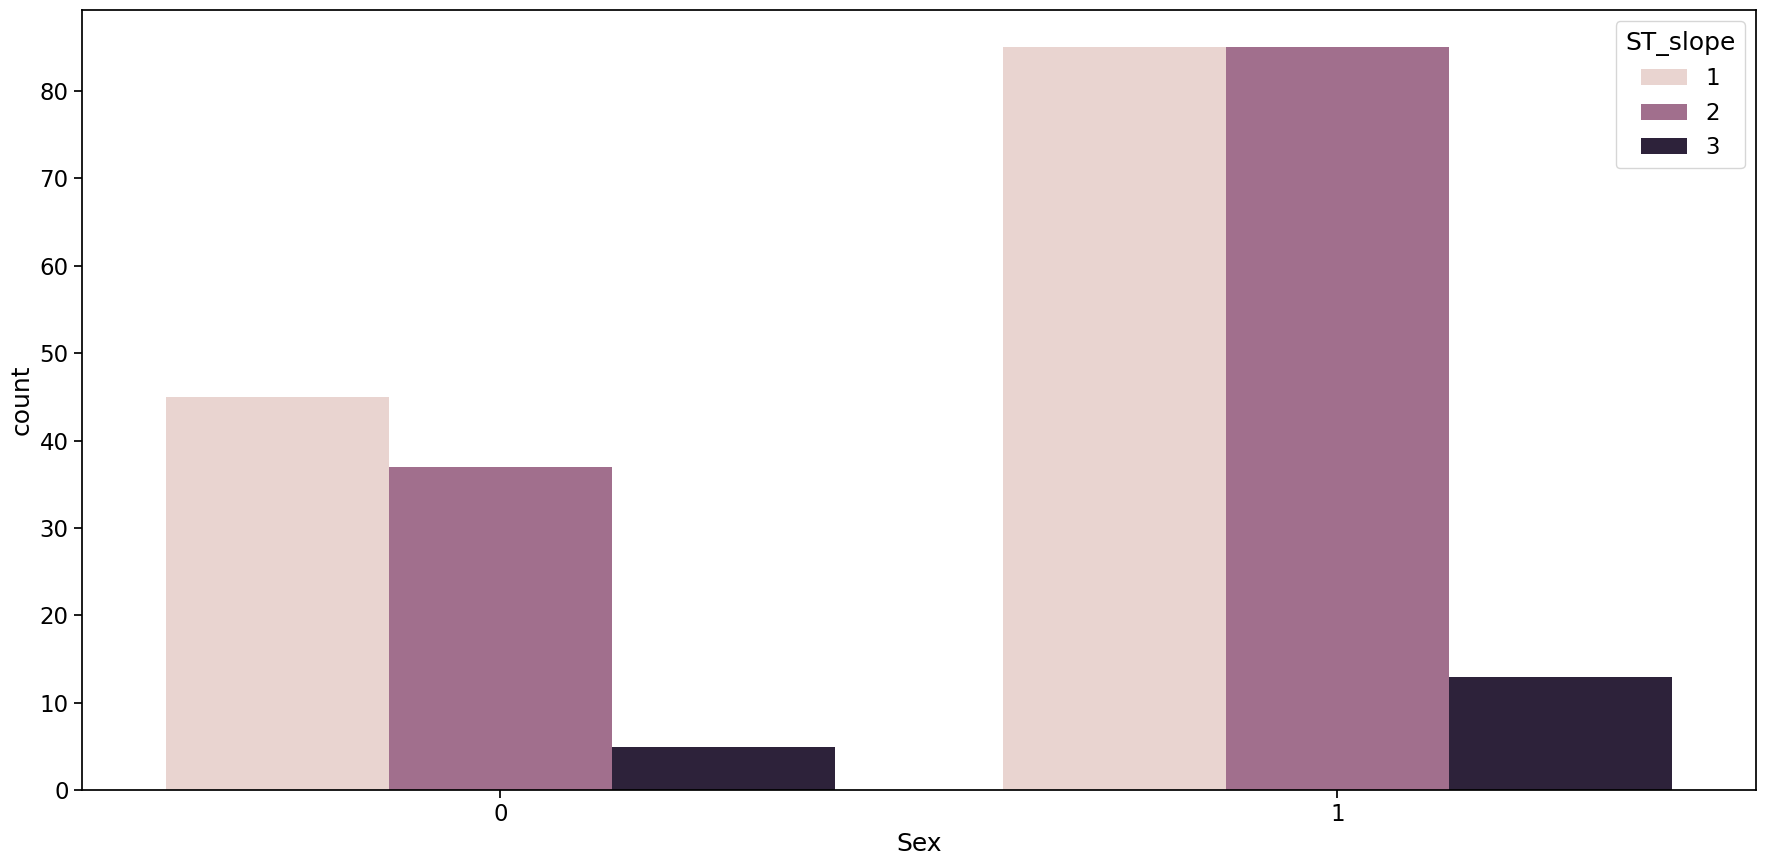

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=df['Sex'], hue=df['ST_slope'], data=df)
plt.tight_layout()

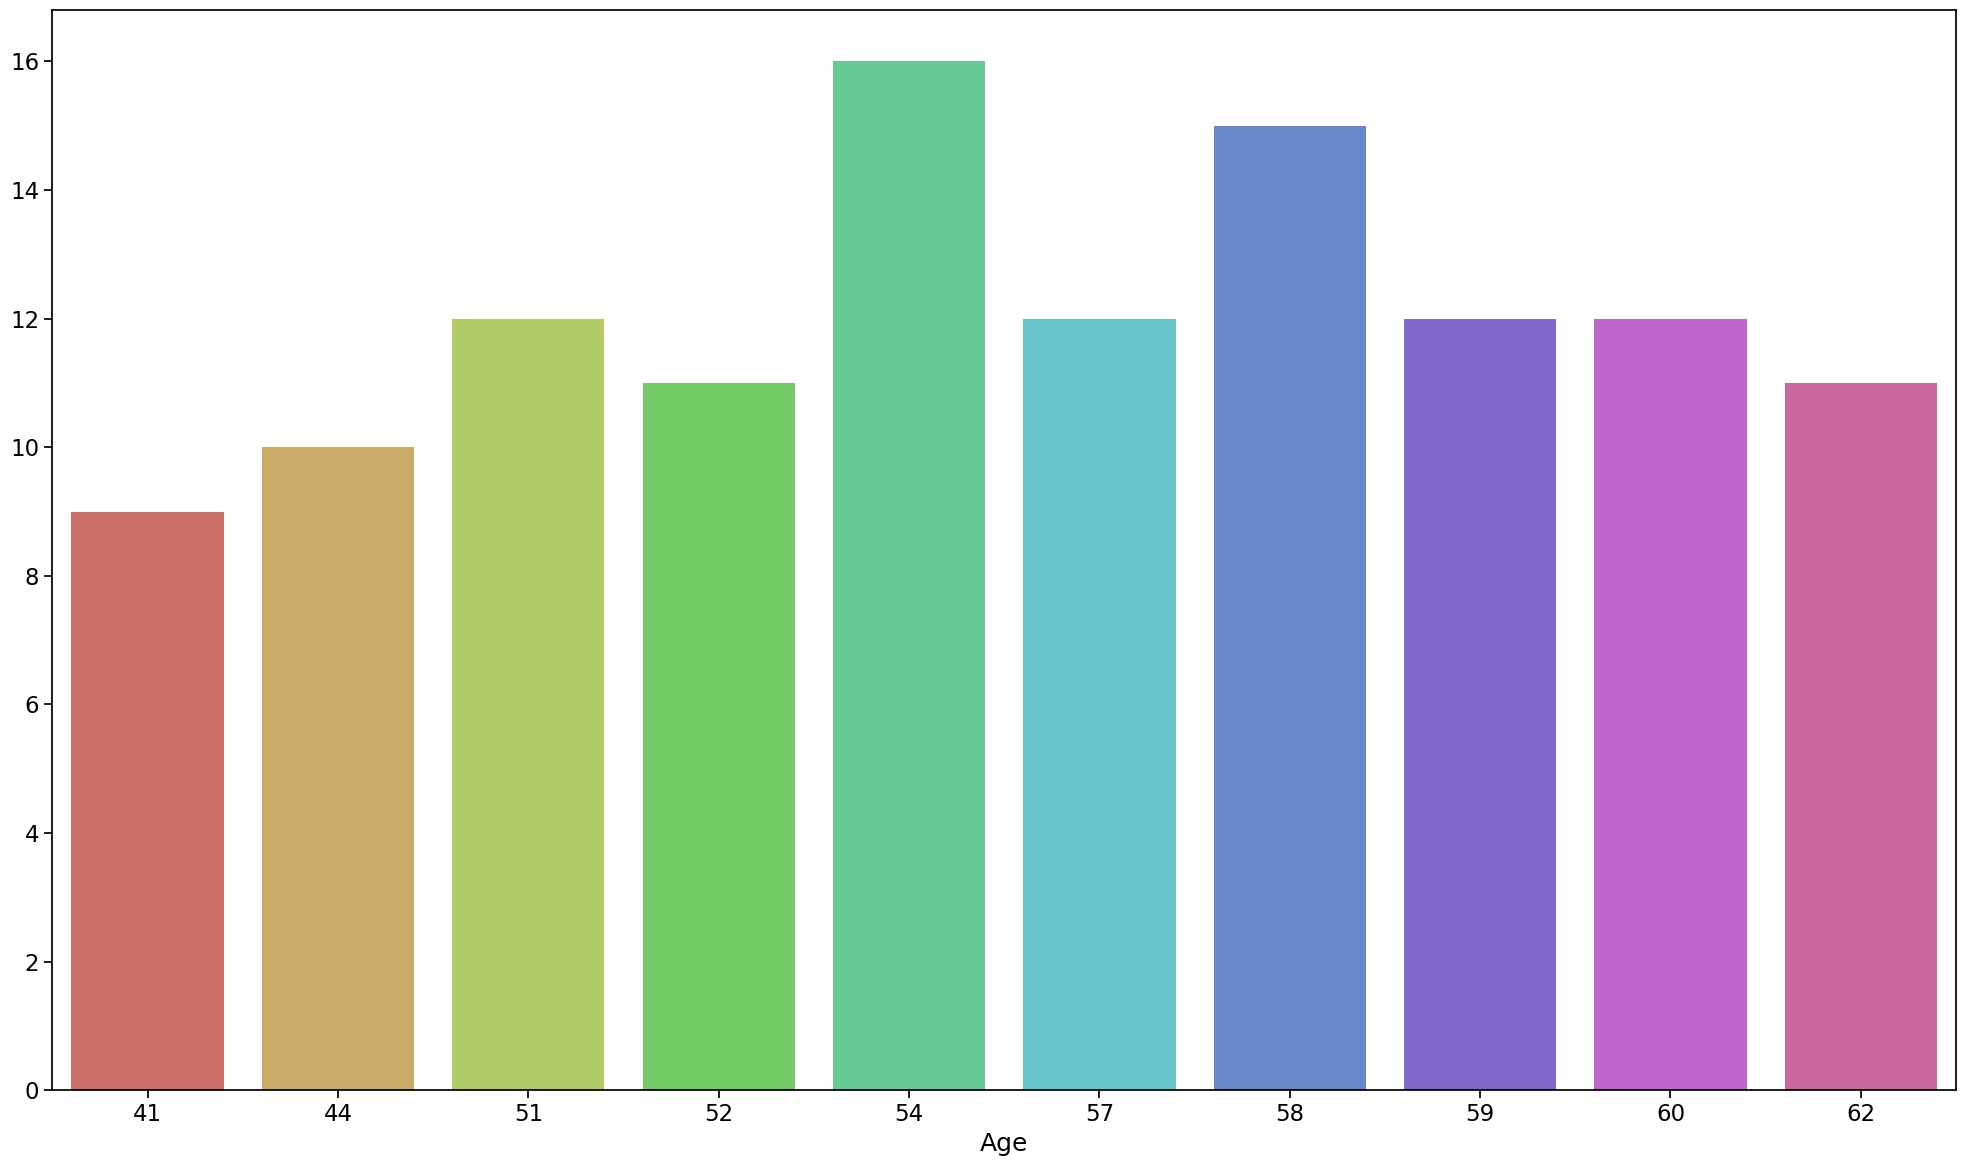

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook', font_scale=1.5)
sns.barplot(x=df.Age.value_counts()[:10].index, y=df.Age.value_counts()[:10].values, palette='hls')
plt.tight_layout()

In [ ]:
minAge = min(df.Age)
maxAge = max(df.Age)
meanAge = df.Age.mean()
print('Min Age:',minAge)
print('Max Age:',maxAge)
print('Mean Age:',meanAge)

Min Age: 29
Max Age: 77
Mean Age: 54.43333333333333


In [ ]:
Young = df[(df.Age>=29)&(df.Age<40)]
Middle = df[(df.Age>=40)&(df.Age<55)]
Elder = df[(df.Age>55)]

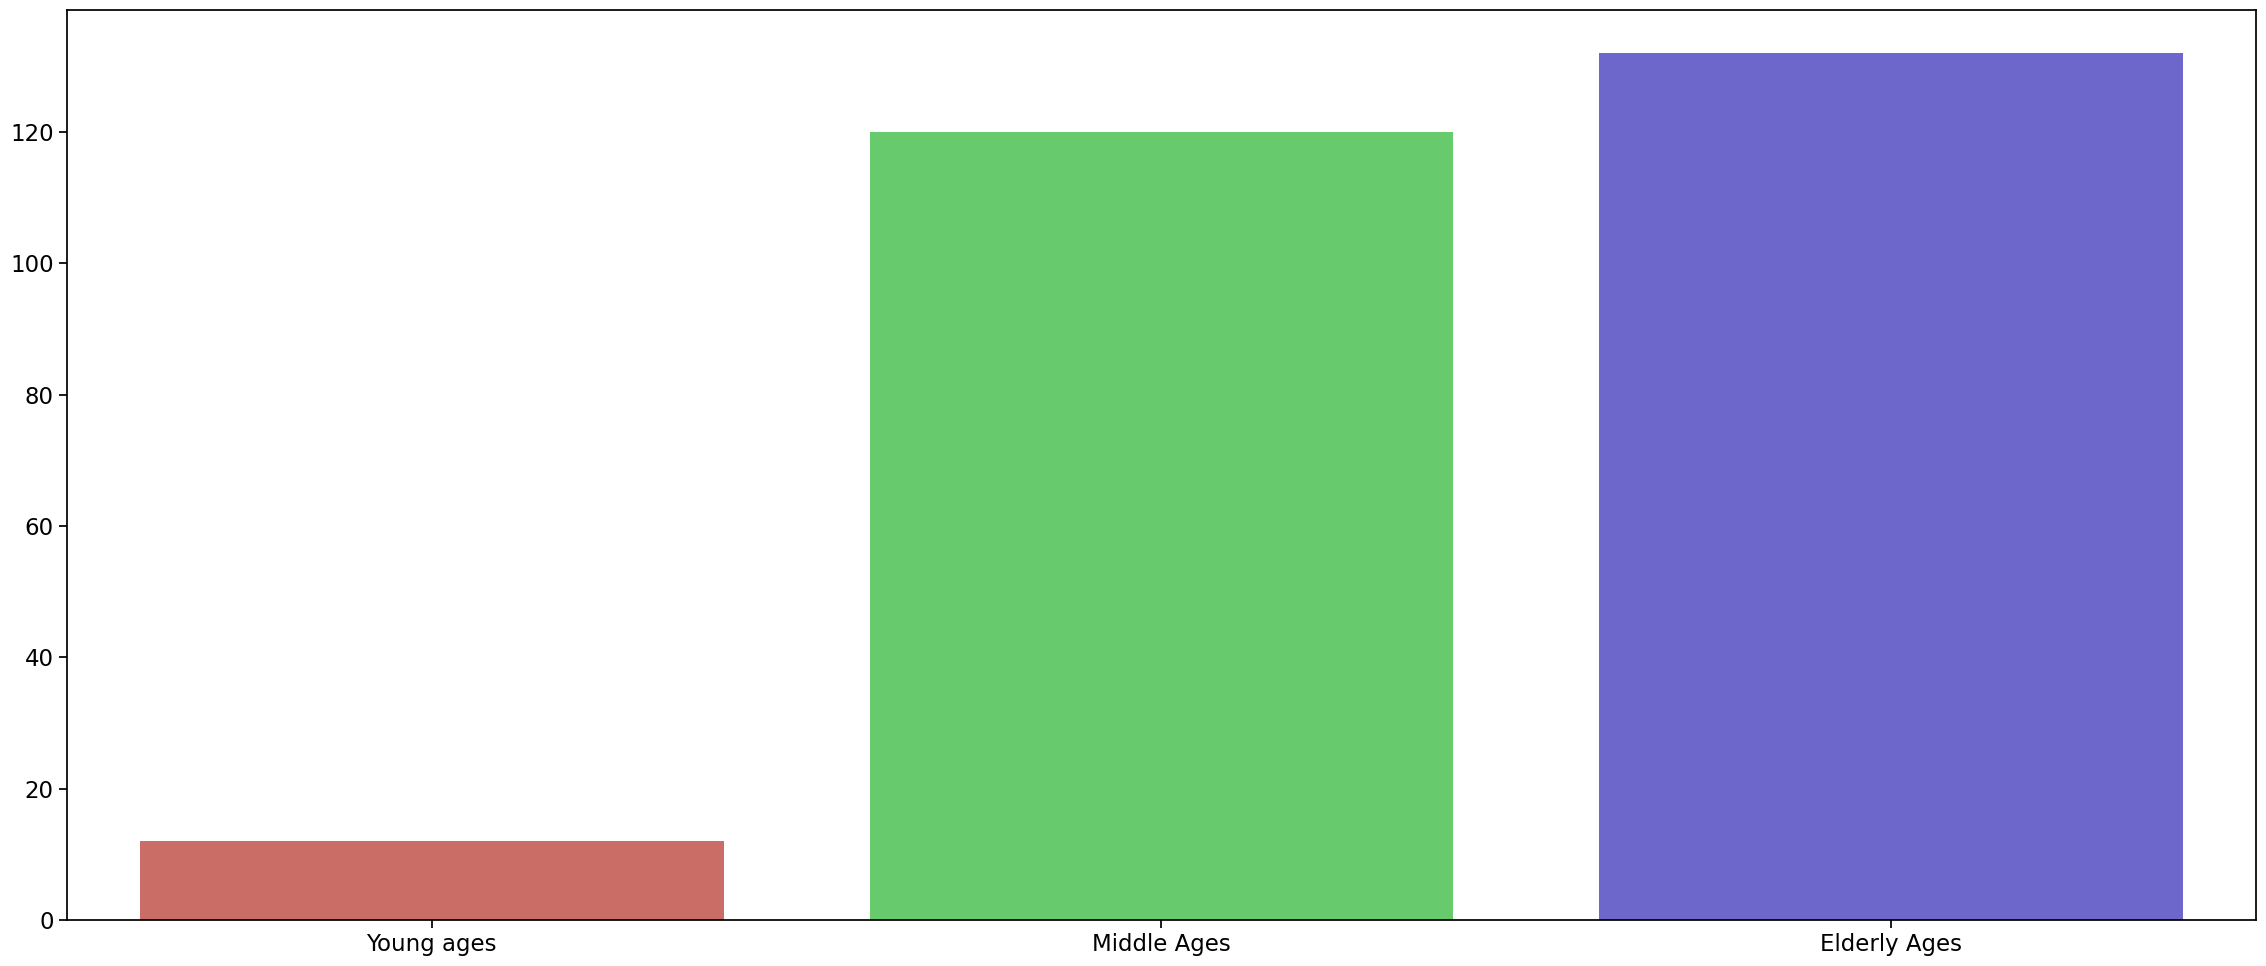

In [ ]:
plt.figure(figsize=(23,10))
sns.set_context('notebook', font_scale=1.5)
sns.barplot(x=['Young ages', 'Middle Ages', 'Elderly Ages'], y=[len(Young), len(Middle), len(Elder)], palette='hls')
plt.tight_layout()

In [ ]:
ct=pd.crosstab(df["chest_pain"],df["target"])

In [ ]:
ct

Heart Disease,0,1
Chest pain type,,
1,15,5
2,35,7
3,62,17
4,38,91


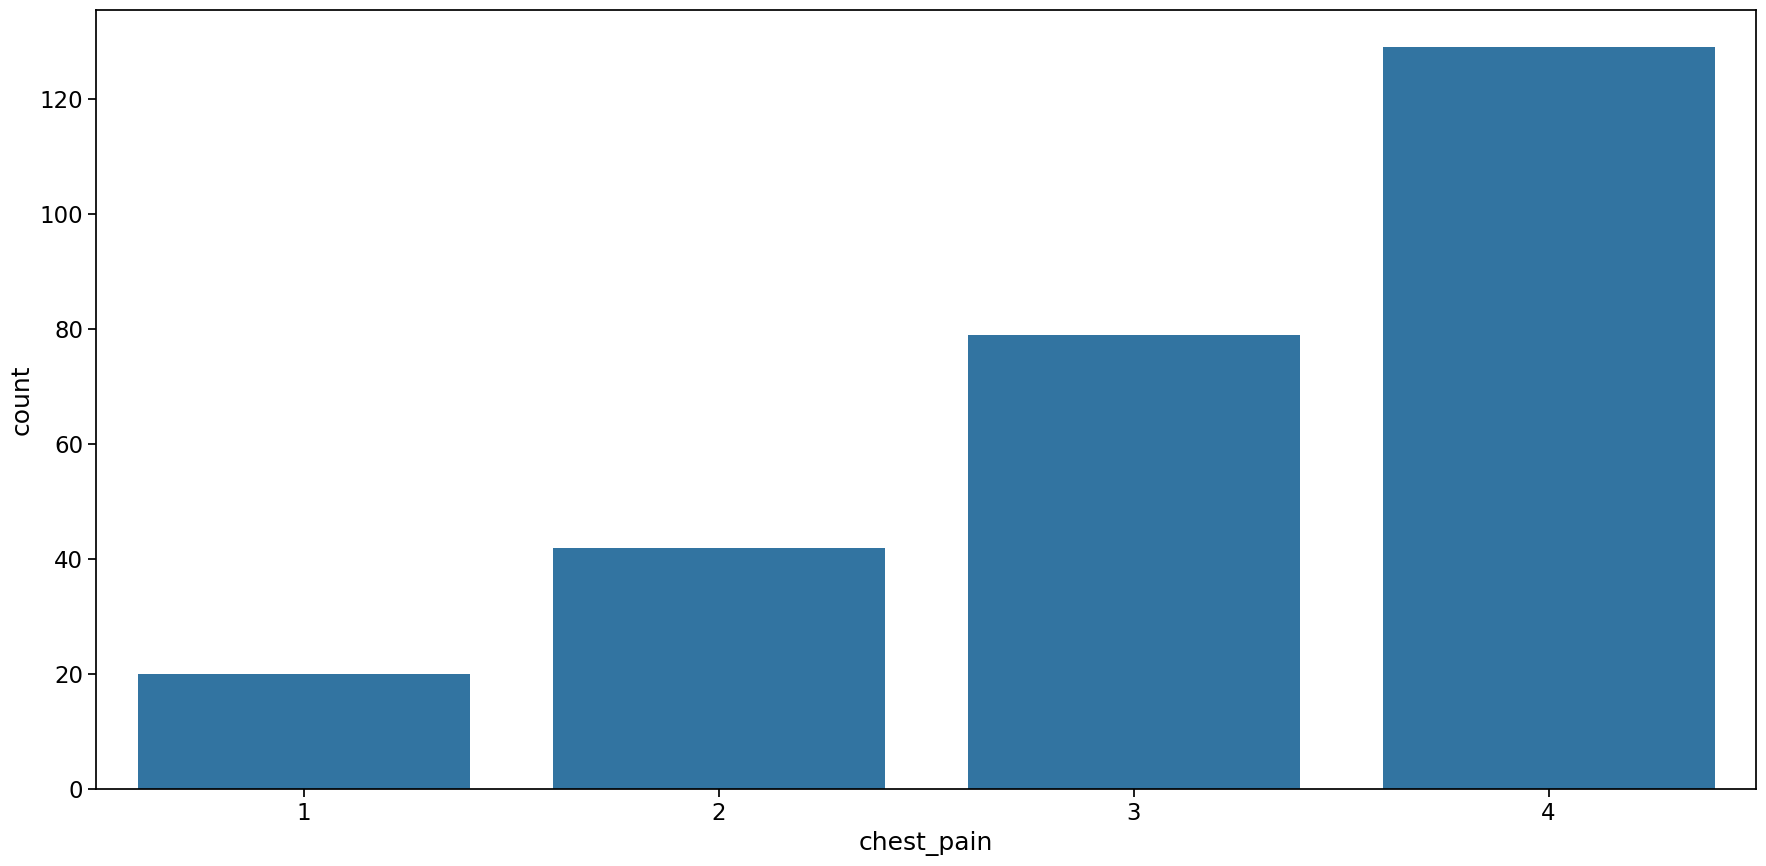

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=df['chest_pain'])
plt.tight_layout()

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

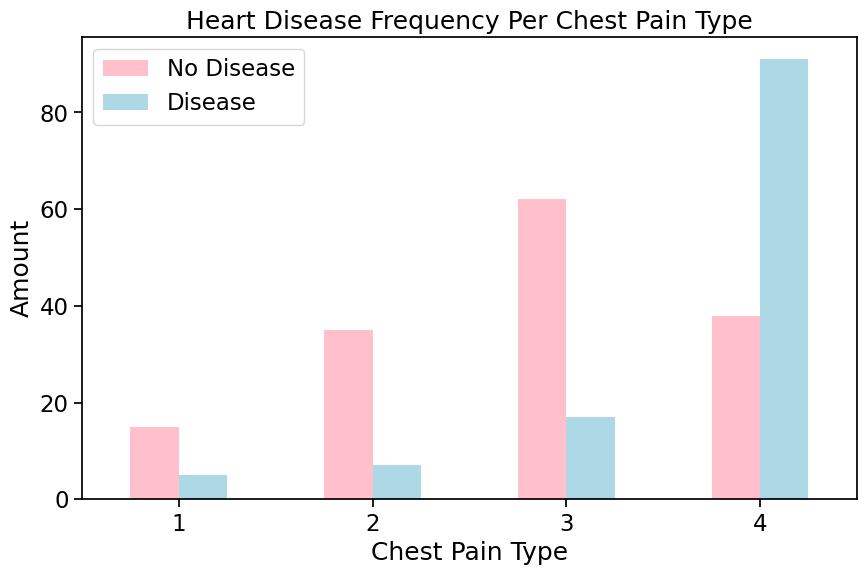

In [ ]:
ct.plot(kind="bar",figsize=(10,6),color=["pink","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

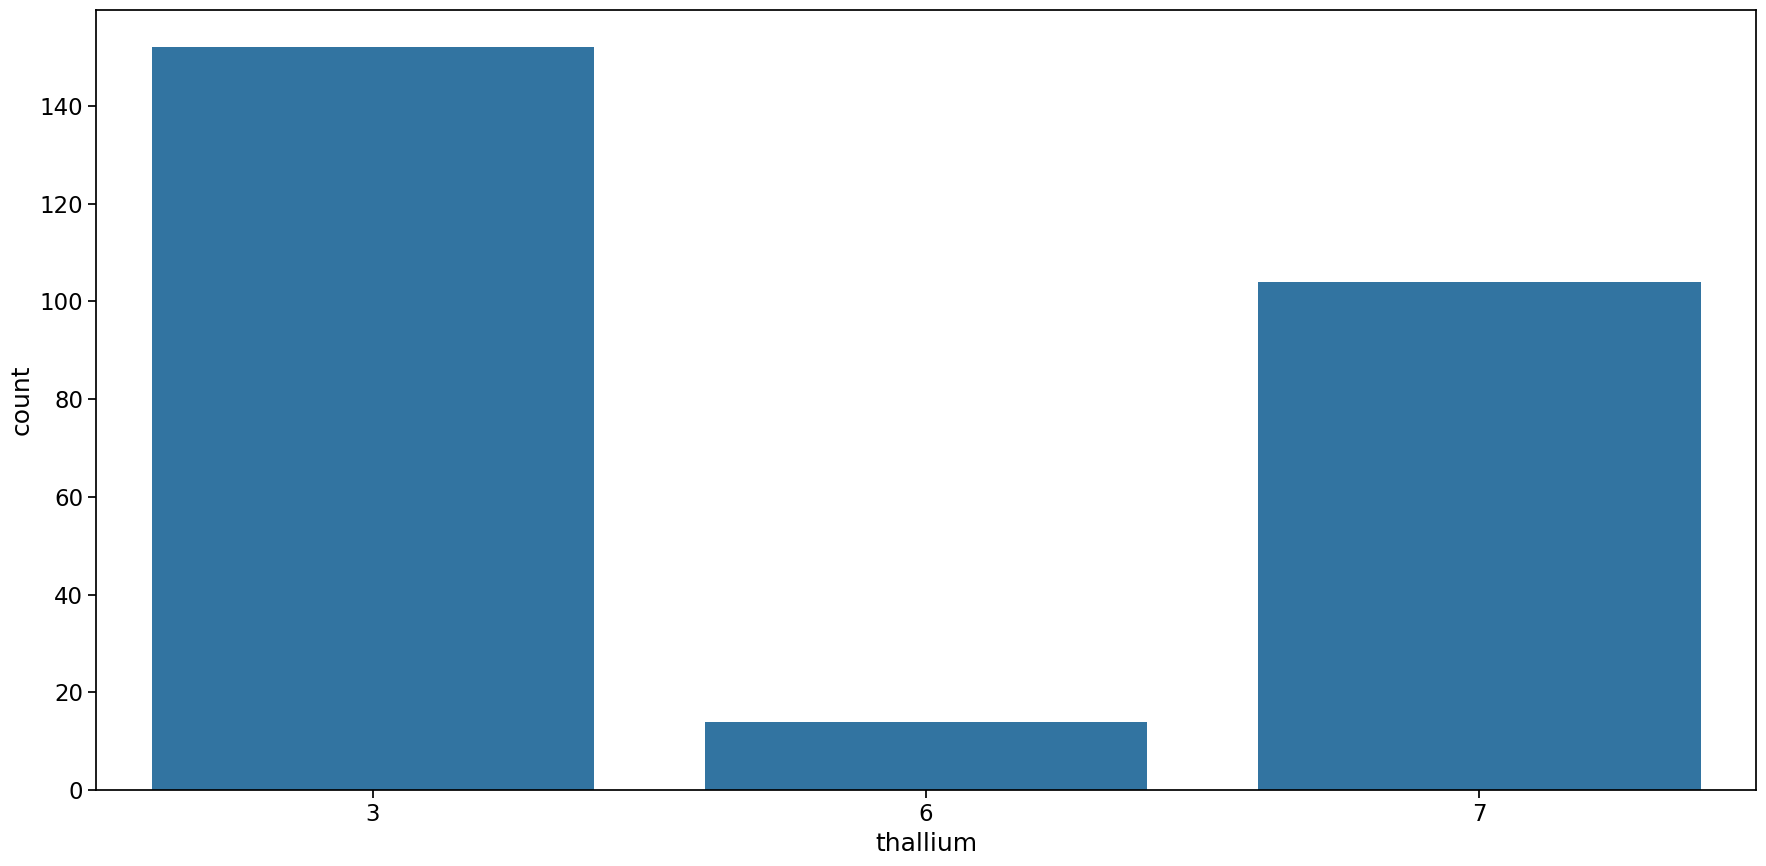

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=df['thallium'])
plt.tight_layout()

In [ ]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = df['target'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


condition_ratio(df)


<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

Most of tumors are diagnosed with Malignant, 54.5% (165 cases). On the other hand, the proportion of Benign in Condition is less than 50%.

In [ ]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """

    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

sex_ratio(df)

<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

The number of Male population are two times of Female population.

In [ ]:
sns.set_context('notebook',font_scale=2.3)
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20,10), title="Correlation with the target feature")
plt.tight_layout()

#Model Building

TRAIN TEST SPLIT
    
    Let’s split our dataset into a 75:25 train and test ratio.

In [ ]:
df['target'].value_counts()
X = df.drop(columns='target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [ ]:
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

LOGISTIC REGRESSION

In [ ]:
model1 = LogisticRegression(random_state=1)
model1.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
pred1 = model1.predict(X_test)
pred1

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1])

In [ ]:
cm1 = confusion_matrix(y_test,pred1)
cm1

array([[33,  5],
       [ 8, 22]])

In [ ]:
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8088235294117647
Testing Sensitivity for Logistic Regression: 0.8048780487804879
Testing Specificity for Logistic Regression: 0.8148148148148148
Testing Precision for Logistic Regression: 0.868421052631579


<Axes: >

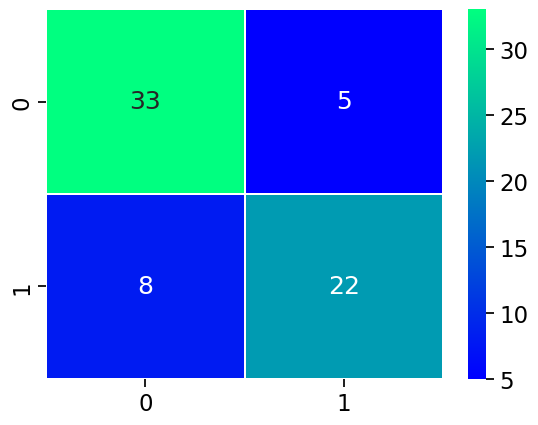

In [ ]:
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.84        38\n           1       0.81      0.73      0.77        30\n\n    accuracy                           0.81        68\n   macro avg       0.81      0.80      0.80        68\nweighted avg       0.81      0.81      0.81        68\n'

DECISION TREE CLASSIFIER

In [ ]:
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
pred2 = model2.predict(X_test)
pred2

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1])

In [ ]:
cm2 = confusion_matrix(y_test,pred1)
cm2

array([[33,  5],
       [ 8, 22]])

In [ ]:
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8088235294117647
Testing Sensitivity for Logistic Regression: 0.8048780487804879
Testing Specificity for Logistic Regression: 0.8148148148148148
Testing Precision for Logistic Regression: 0.868421052631579


<Axes: >

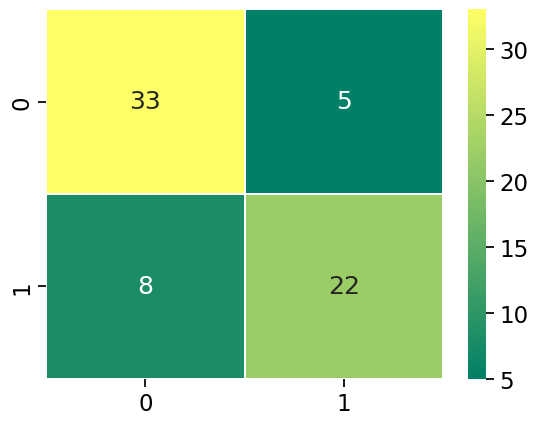

In [ ]:
sns.heatmap(cm1, annot=True,cmap='summer',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.84        38\n           1       0.81      0.73      0.77        30\n\n    accuracy                           0.81        68\n   macro avg       0.81      0.80      0.80        68\nweighted avg       0.81      0.81      0.81        68\n'

RANDOM FOREST CLASSIFIER

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred3 = model3.predict(X_test)
pred3

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0])

In [ ]:
cm3 = confusion_matrix(y_test,pred1)
cm3

array([[33,  5],
       [ 8, 22]])

In [ ]:
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8088235294117647
Testing Sensitivity for Logistic Regression: 0.8048780487804879
Testing Specificity for Logistic Regression: 0.8148148148148148
Testing Precision for Logistic Regression: 0.868421052631579


<Axes: >

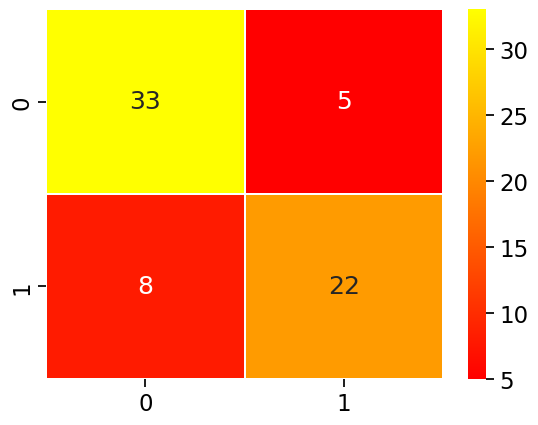

In [ ]:
sns.heatmap(cm1, annot=True,cmap='autumn',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.84        38\n           1       0.81      0.73      0.77        30\n\n    accuracy                           0.81        68\n   macro avg       0.81      0.80      0.80        68\nweighted avg       0.81      0.81      0.81        68\n'

SUPPORT VECTOR MACHINE

In [ ]:
model4 =SVC()
model4.fit(X_train, y_train)

SVC()

In [ ]:
pred4 = model4.predict(X_test)
pred4

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0])

In [ ]:
cm4 = confusion_matrix(y_test,pred1)
cm4

array([[33,  5],
       [ 8, 22]])

In [ ]:
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8088235294117647
Testing Sensitivity for Logistic Regression: 0.8048780487804879
Testing Specificity for Logistic Regression: 0.8148148148148148
Testing Precision for Logistic Regression: 0.868421052631579


<Axes: >

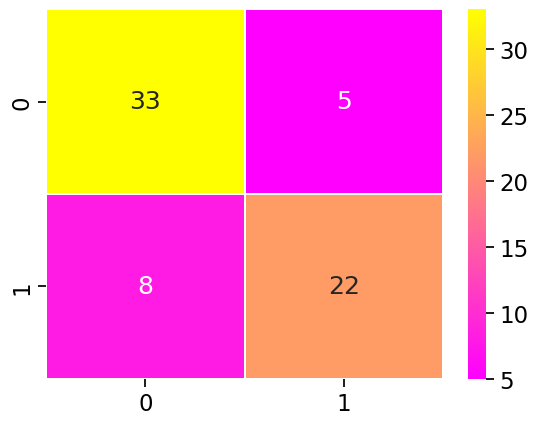

In [ ]:
sns.heatmap(cm1, annot=True,cmap='spring',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.84        38\n           1       0.81      0.73      0.77        30\n\n    accuracy                           0.81        68\n   macro avg       0.81      0.80      0.80        68\nweighted avg       0.81      0.81      0.81        68\n'

#Ensemble Techniques

1. Max Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
vote.fit(X_train,y_train)
vote.score(X_test,y_test)

0.7794117647058824

2. Averaging

In [ ]:
model1 = tree.DecisionTreeClassifier()
model6 = KNeighborsClassifier()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model6.fit(X_train,y_train)

pred_1 =model1.predict_proba(X_test)
pred_2 =model2.predict_proba(X_test)
pred_6 =model6.predict_proba(X_test)

finalpred=(pred_1+pred_2+pred_6)/3
finalpred

3. Weighted Average

In [ ]:
finalpred=(pred_6*0.3+pred_2*0.3+pred_1*0.4)
finalpred

array([[0.88, 0.12],
       [0.82, 0.18],
       [0.3 , 0.7 ],
       [1.  , 0.  ],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.24, 0.76],
       [0.12, 0.88],
       [0.24, 0.76],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.12, 0.88],
       [0.76, 0.24],
       [0.82, 0.18],
       [0.94, 0.06],
       [0.88, 0.12],
       [0.82, 0.18],
       [0.18, 0.82],
       [0.18, 0.82],
       [0.88, 0.12],
       [0.18, 0.82],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.3 , 0.7 ],
       [0.88, 0.12],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.88, 0.12],
       [0.24, 0.76],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.12, 0.88],
       [0.88, 0.12],
       [0.12, 0.88],
       [0.18, 0.82],
       [0.82, 0.18],
       [0.88, 0.12],
       [0.94, 0.06],
       [0.94, 0.06],
       [0.12, 0.88],
       [0.94,

#Model Testing

**CASE-1 :** For heart disease data

In [ ]:
input = (63,3,145,233,150,2.3,0,13,44,7.9,19.99,1)
input_as_numpy = np.asarray(input)
input_reshaped = input_as_numpy.reshape(1,-1)
pre1 = model2.predict(input_reshaped)
if(pre1 == 1):
  print("The patient seems to be have heart disease :(")
else:
  print("The patient seems to be Normal :)")


The patient seems to be have heart disease :(


**CASE-2 :** For normal data

In [ ]:
input=(72,1,125,200,150,1.3,1,63,3,145,233,150)
input_as_numpy = np.asarray(input)
input_reshaped = input_as_numpy.reshape(1,-1)
pre1 = model2.predict(input_reshaped)
if(pre1 == 1):
  print("The patient seems to be have heart disease :(")
else:
  print("The patient seems to be Normal :)")

The patient seems to be Normal:)


#Conclusion


Finally, we can conclude that real-time predictors will be essential in the healthcare sector nowadays. From this project, we will be able to predict real-time heart disease using the patient’s data from the model using the Decision Tree Algorithm, thereby making accurate heart disease prediction using machine learning.